##  Insurance Fraud Detection

### Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, We are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
We work on the auto insurance data to demonstrate how we can create a predictive model that predicts if an insurance claim is fraudulent or not. 

### Import Liberary

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [140]:
df=pd.read_csv("FraudDetection")

In [141]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [142]:
df.shape

(1000, 40)

### Correct Data Format

In [143]:
# Replace "?" values with NaN for imputer
df=df.replace("?",np.NaN)

In [144]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [145]:
dropable_columns=["policy_number","policy_bind_date","policy_state","insured_zip","incident_location","incident_date","incident_state","incident_city","auto_make","auto_model","auto_year"]

In [146]:
df.drop(dropable_columns,1,inplace=True)

In [147]:
df.shape

(1000, 29)

###  Checking Null Values


In [148]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                 360
bodily_injuries                   0
witnesses                         0
police_report_available         343
total_claim_amount                0
injury_claim                      0
property_claim                    0
vehicle_claim                     0
fraud_reported              

In [149]:
data_mode=dict(df.mode().iloc[0])

In [150]:
data=df.fillna(data_mode)

### Data Description

In [151]:
data.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,NaN
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,NaN
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,NaN
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,NaN
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,NaN
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,NaN
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,NaN


In [152]:
data.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,_c39
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,NaN
age,0.922098,1.000000,0.029188,0.014404,0.018126,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,NaN
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,NaN
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,NaN
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,NaN
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.047268,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,NaN
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.024056,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,NaN
incident_hour_of_the_day,0.070639,0.087161,0.060935,-0.001578,-0.023257,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,NaN
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.045991,-0.021270,0.061643,-0.014895,0.120794,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393,NaN
bodily_injuries,-0.010162,-0.015679,-0.022765,0.026780,0.022743,0.055829,-0.024418,-0.034563,0.014030,1.000000,-0.005606,0.047093,0.047319,0.039749,0.043449,NaN


### Graph Plotting

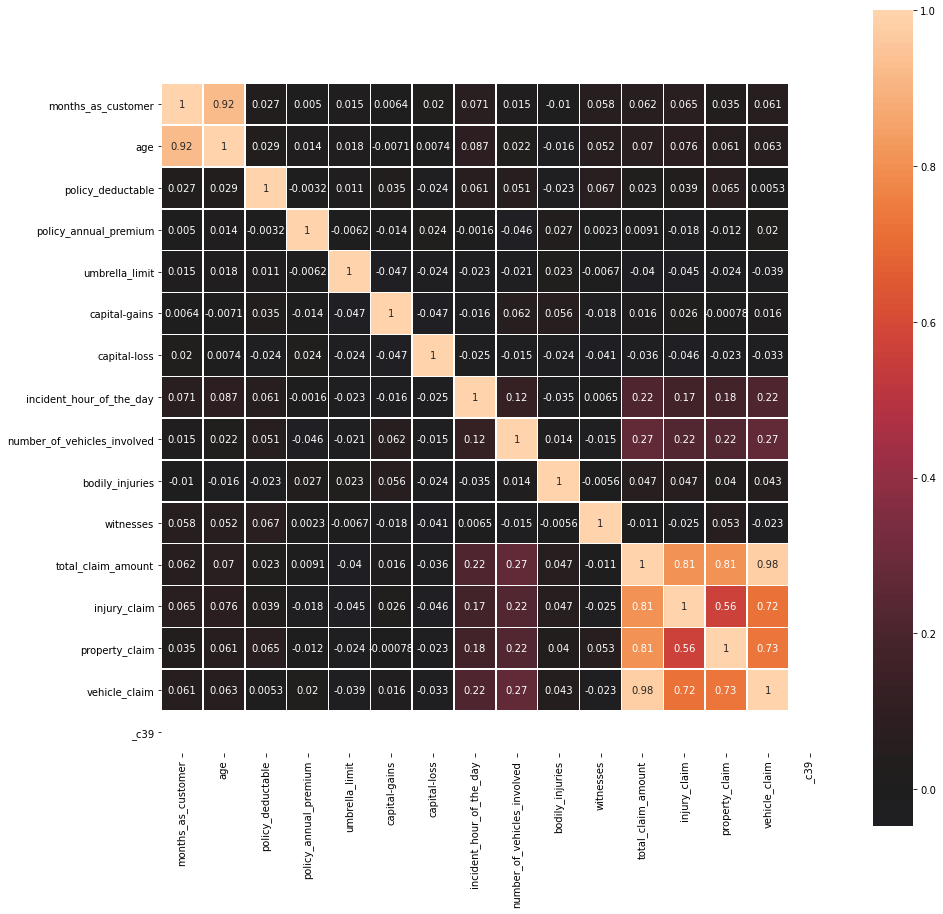

In [153]:
plt.figure(figsize=(15,15))
ax=sns.heatmap(data.corr(),linewidths=.5,square=True,center=0,annot=True)

In [154]:
data.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported',
       '_c39'],
      dtype='object')

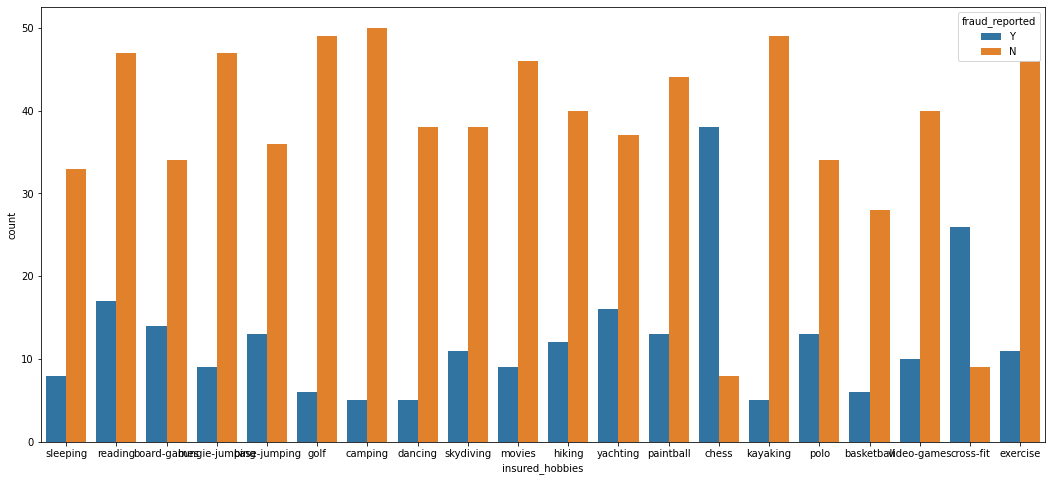

In [155]:
f,ax=plt.subplots(figsize=(18,8))
sns.countplot(x="insured_hobbies",hue="fraud_reported",data=data)

### Checking Data is balance or not

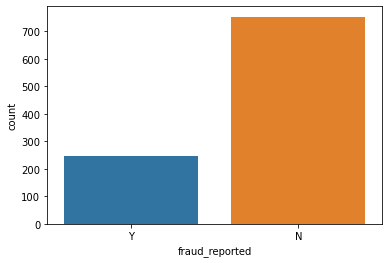

In [156]:
sns.countplot(x="fraud_reported",data=data)

### Label Encoder and One Hot Encoder

In [157]:
cat_df=data.select_dtypes(include=["object"]).copy()

In [158]:
num_df=data.select_dtypes(include=["int64"]).copy()

In [159]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Y
2,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y
4,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO,N


In [160]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'property_damage', 'police_report_available',
       'fraud_reported'],
      dtype='object')

In [161]:
for column in cat_df.columns:
    le=LabelEncoder()
    cat_df[column]=le.fit_transform(cat_df[column])

In [162]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,1,1,4,2,17,0,2,2,0,4,1,1,1
1,1,1,4,6,15,2,3,1,1,4,0,0,1
2,0,0,6,11,2,3,0,1,1,4,0,0,0
3,1,0,6,1,2,4,2,0,0,4,0,0,1
4,2,1,0,11,2,4,3,1,1,2,0,0,0


In [163]:
num_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,0,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,2000,5000000,0,0,8,1,0,0,5070,780,780,3510
2,134,29,2000,5000000,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,2000,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,1000,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550


In [164]:
final_df=pd.concat([num_df,cat_df],axis=1)

In [165]:
final_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,328,48,1000,0,53300,0,5,1,1,2,...,2,17,0,2,2,0,4,1,1,1
1,228,42,2000,5000000,0,0,8,1,0,0,...,6,15,2,3,1,1,4,0,0,1
2,134,29,2000,5000000,35100,0,7,3,2,3,...,11,2,3,0,1,1,4,0,0,0
3,256,41,2000,6000000,48900,-62400,5,1,1,2,...,1,2,4,2,0,0,4,0,0,1
4,228,44,1000,6000000,66000,-46000,20,1,0,1,...,11,2,4,3,1,1,2,0,0,0


In [166]:
target_value="fraud_reported"
x=final_df.drop([target_value],1)
y=final_df[target_value]

### Split data into train and test

In [167]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=2020)

### Train the Model

### Random Forest Classifier

In [168]:
clf=RandomForestClassifier(n_estimators=100)


In [169]:
pred_y=clf.fit(train_x,train_y).predict(test_x)

In [170]:
accuracy_score(test_y,pred_y)

0.7433333333333333

In [171]:
confusion_matrix(test_y,pred_y)

array([[201,  27],
       [ 50,  22]], dtype=int64)

In [172]:
roc_auc_score(test_y,pred_y)

0.5935672514619883

### ROC_Curve

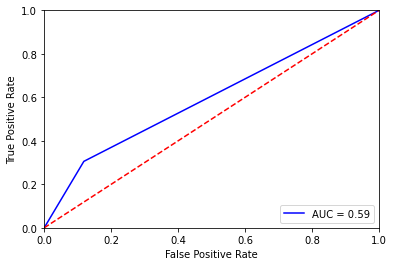

In [173]:
fpr,tpr,threshold=metrics.roc_curve(test_y,pred_y)
roc_auc=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,"b",label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### Support Vector Classifier

In [174]:
clf2=SVC()


In [175]:
pred2_y=clf2.fit(train_x,train_y).predict(test_x)

In [176]:
accuracy_score(test_y,pred2_y)

0.76

In [177]:
confusion_matrix(test_y,pred2_y)

array([[228,   0],
       [ 72,   0]], dtype=int64)

In [178]:
roc_auc_score(test_y,pred2_y)

0.5

### Grid Search CV for better accuracy

In [184]:
param_grid={"kernel":["rbf","sigmoid"],
           "C":[0.1,0.5,1.0],
           "random_state":[0,10,20,30]}

In [185]:
grid=GridSearchCV(estimator=clf2,param_grid=param_grid,cv=5,verbose=3)

In [186]:
grid.fit(train_x,train_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=0.1, kernel=rbf, random_state=0 ...............................
[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.750, total=   0.1s
[CV] C=0.1, kernel=rbf, random_state=0 ...............................
[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.750, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=0 ...............................
[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.750, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=0 ...............................
[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.750, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=0 ...............................
[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.750, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=10 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .. C=0.1, kernel=rbf, random_state=10, score=0.750, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=10 ..............................
[CV] .. C=0.1, kernel=rbf, random_state=10, score=0.750, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=10 ..............................
[CV] .. C=0.1, kernel=rbf, random_state=10, score=0.750, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=10 ..............................
[CV] .. C=0.1, kernel=rbf, random_state=10, score=0.750, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=10 ..............................
[CV] .. C=0.1, kernel=rbf, random_state=10, score=0.750, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=20 ..............................
[CV] .. C=0.1, kernel=rbf, random_state=20, score=0.750, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=20 ..............................
[CV] .. C=0.1, kernel=rbf, random_state=20, score=0.750, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=20 ..............................
[CV] .

[CV]  C=0.5, kernel=sigmoid, random_state=20, score=0.743, total=   0.0s
[CV] C=0.5, kernel=sigmoid, random_state=20 ..........................
[CV]  C=0.5, kernel=sigmoid, random_state=20, score=0.750, total=   0.0s
[CV] C=0.5, kernel=sigmoid, random_state=20 ..........................
[CV]  C=0.5, kernel=sigmoid, random_state=20, score=0.750, total=   0.0s
[CV] C=0.5, kernel=sigmoid, random_state=20 ..........................
[CV]  C=0.5, kernel=sigmoid, random_state=20, score=0.750, total=   0.0s
[CV] C=0.5, kernel=sigmoid, random_state=20 ..........................
[CV]  C=0.5, kernel=sigmoid, random_state=20, score=0.750, total=   0.0s
[CV] C=0.5, kernel=sigmoid, random_state=30 ..........................
[CV]  C=0.5, kernel=sigmoid, random_state=30, score=0.743, total=   0.0s
[CV] C=0.5, kernel=sigmoid, random_state=30 ..........................
[CV]  C=0.5, kernel=sigmoid, random_state=30, score=0.750, total=   0.0s
[CV] C=0.5, kernel=sigmoid, random_state=30 ...................

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    3.1s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1.0], 'kernel': ['rbf', 'sigmoid'],
                         'random_state': [0, 10, 20, 30]},
             verbose=3)

In [189]:
grid.best_estimator_

SVC(C=0.1, random_state=0)

In [187]:
grid.best_estimator_

SVC(C=0.1, random_state=0)